<a href="https://colab.research.google.com/github/annisaeka123/PCVK-_Semester-5/blob/main/week6/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MODUL 7 – Filter Spasial Low Pass Filter, High Pass Filter, Point
Detection, Line Detection, Edge Detection**


Nama : Annisa Eka Puspita

Kelas : TI-3H

Absen : 02

NIM : 2341720131

-------------------------------

**D. PRAKTIKUM FILTER**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

a. Membuat fungsi konvolusi manual

In [5]:
def convolution2d(image, kernel, stride=1, padding=0):
    # Dapatkan ukuran gambar
    (h, w) = image.shape
    (kh, kw) = kernel.shape

    # Tambahkan padding di sekitar citra
    if padding > 0:
        image_padded = np.zeros((h + 2*padding, w + 2*padding))
        image_padded[padding:h+padding, padding:w+padding] = image
    else:
        image_padded = image

    # Hitung ukuran output
    out_h = (h - kh + 2*padding)//stride + 1
    out_w = (w - kw + 2*padding)//stride + 1
    output = np.zeros((out_h, out_w))

    # Flip kernel (sesuai definisi konvolusi)
    kernel_flipped = np.flipud(np.fliplr(kernel))

    # Proses konvolusi
    for y in range(0, out_h):
        for x in range(0, out_w):
            region = image_padded[y*stride:y*stride+kh, x*stride:x*stride+kw]
            output[y, x] = np.sum(region * kernel_flipped)

    return output

b. Load citra dan ubah jadi grayscale

In [6]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

c. Kernel sharpening

Menentukan kernel yang akan digunakan

In [7]:
#image sharpen
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

d. Terapkan konvolusi

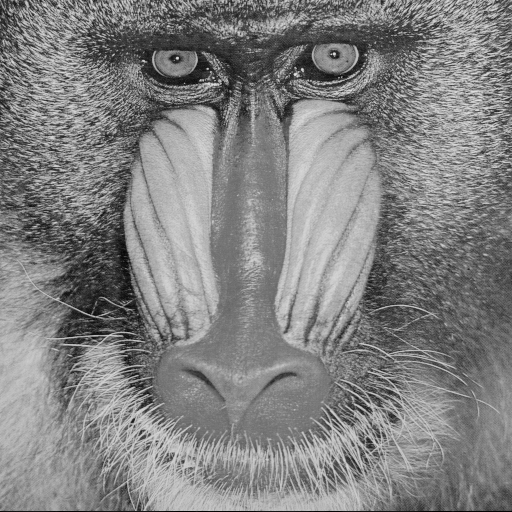

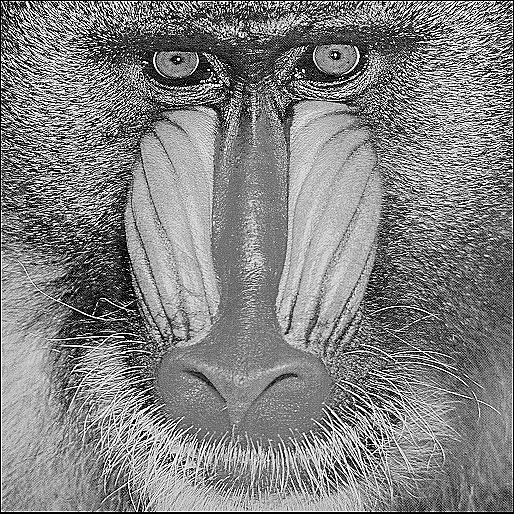

In [8]:
output = convolution2d(img_gray, kernel_sharpen, stride=1, padding=2)

# Normalisasi hasil agar bisa ditampilkan
output = np.clip(output, 0, 255).astype(np.uint8)

# Tampilkan hasil
cv2_imshow(img_gray)
cv2_imshow(output)

e. menerapkan Average filter, Low-pass filter, High-pass filter menggunakan fungsi convolution2d yang sudah dibuat sebelumnya

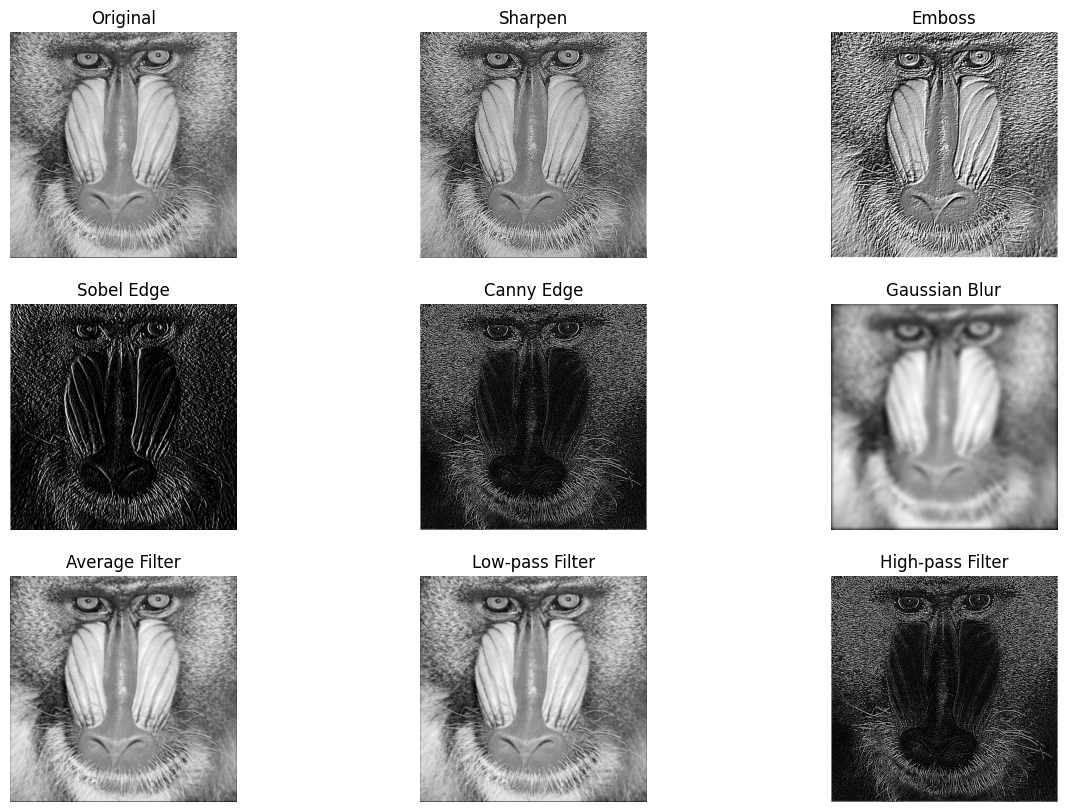

In [10]:
# ========================================
# Daftar Kernel Sesuai Operasi
# ========================================

# Sharpen
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Emboss
kernel_emboss = np.array([[-2, -1, 0],
                          [-1,  1, 1],
                          [ 0,  1, 2]])

# Left Sobel Edge Detection
kernel_sobel_left = np.array([[ 1,  0, -1],
                              [ 2,  0, -2],
                              [ 1,  0, -1]])

# Canny Edge Detection (Laplacian)
kernel_canny = np.array([[-1, -1, -1],
                         [-1,  8, -1],
                         [-1, -1, -1]])

# Gaussian Blur 21x21
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel_1d = cv.getGaussianKernel(kernel_size, sigma)
gaussian_kernel_2d = gaussian_kernel_1d @ gaussian_kernel_1d.T

# Average Filter
kernel_avg = np.ones((3,3), dtype=np.float32) / 9.0

# Low-pass Filter (mirip smoothing)
kernel_lowpass = np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]], dtype=np.float32) / 9.0

# High-pass Filter
kernel_highpass = np.array([[ -1, -1, -1],
                            [ -1,  8, -1],
                            [ -1, -1, -1]], dtype=np.float32)


# ========================================
# Terapkan Semua Filter
# ========================================
out_sharpen  = convolution2d(img_gray, kernel_sharpen, 1, 1)
out_emboss   = convolution2d(img_gray, kernel_emboss, 1, 1)
out_sobel    = convolution2d(img_gray, kernel_sobel_left, 1, 1)
out_canny    = convolution2d(img_gray, kernel_canny, 1, 1)
out_gaussian = convolution2d(img_gray, gaussian_kernel_2d, 1, kernel_size//2)
out_avg      = convolution2d(img_gray, kernel_avg, 1, 1)
out_low      = convolution2d(img_gray, kernel_lowpass, 1, 1)
out_high     = convolution2d(img_gray, kernel_highpass, 1, 1)

# Normalisasi hasil
def normalize(img):
    return np.clip(img, 0, 255).astype(np.uint8)

out_sharpen  = normalize(out_sharpen)
out_emboss   = normalize(out_emboss)
out_sobel    = normalize(out_sobel)
out_canny    = normalize(out_canny)
out_gaussian = normalize(out_gaussian)
out_avg      = normalize(out_avg)
out_low      = normalize(out_low)
out_high     = normalize(out_high)

# ========================================
# Tampilkan hasil (opsional dalam grid matplotlib)
# ========================================
titles = ["Original", "Sharpen", "Emboss", "Sobel Edge",
          "Canny Edge", "Gaussian Blur", "Average Filter",
          "Low-pass Filter", "High-pass Filter"]
images = [img_gray, out_sharpen, out_emboss, out_sobel,
          out_canny, out_gaussian, out_avg, out_low, out_high]

plt.figure(figsize=(15,10))
for i in range(len(images)):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.show()


**E. FILTER LIBRARY DAN FILTER MODERN**



Percobaan 1:

Membuat Filter Gaussian, Sharpen, dan Canny menggunakan library
filter2d dari OpenCV. Filter ini akan diterapkan pada Image RGB. Pada bagian awal kode terdapat
fungsi show_side_by_side yang digunakan untuk menampilkan gambar secara berdampingan.

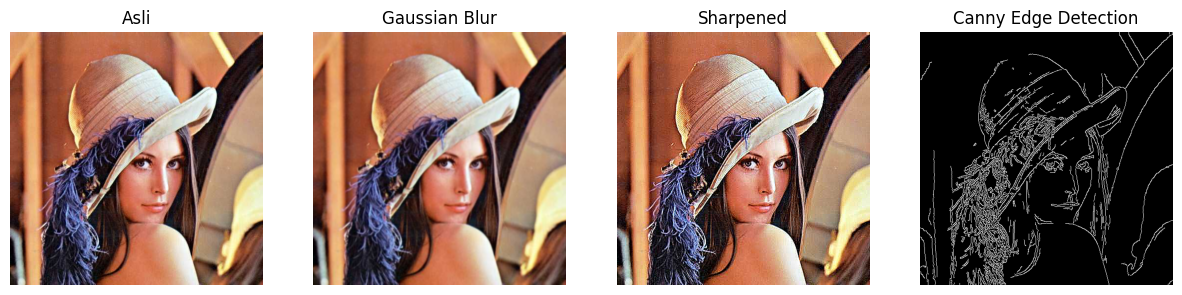

In [11]:
# Fungsi tampil berdampingan
def show_side_by_side(images, titles, figsize=(15,5)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        if len(img.shape) == 2: # grayscale
            plt.subplot(1, len(images), i+1)
            plt.imshow(img, cmap="gray")
        else: # color
            plt.subplot(1, len(images), i+1)
            plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.show()

img = cv.imread("/content/drive/MyDrive/PCVK/Images/lena.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

blur = cv.GaussianBlur(img, (7,7), 1)
edges = cv.Canny(cv.cvtColor(img, cv.COLOR_BGR2GRAY), 100, 200)
sharpen_kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
sharpened = cv.filter2D(img, -1, sharpen_kernel)
show_side_by_side([img, blur, sharpened, edges],
                  ["Asli", "Gaussian Blur", "Sharpened", "Canny Edge Detection"])

Percobaan 2:


Pada percobaan 2 berikut ini akan dilakukan filtering modern dari Library OpenCV. Dua filter yang akan
digunakan adalah Bilateral Filtering dan Guided Filter. Bilateral filtering adalah sebuah metode
penyaringan non-linear yang banyak digunakan untuk menghaluskan citra sekaligus tetap
mempertahankan ketajaman tepi. Guided filtering merupakan teknik yang lebih modern dan efisien. Filter ini didasarkan pada asumsi
bahwa, dalam sebuah jendela lokal, hasil penyaringan dapat direpresentasikan sebagai fungsi linear
dari citra pemandu (guide image).

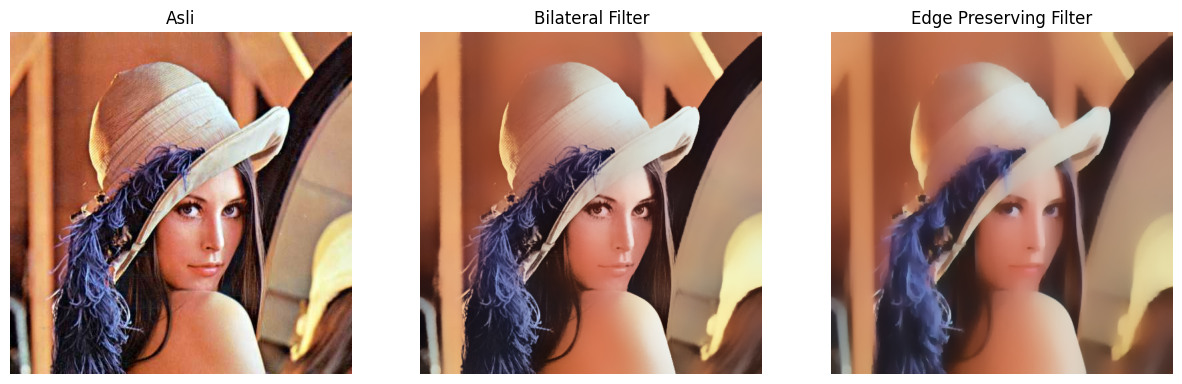

In [12]:
#Filter Modern dari OpenCV
# Bilateral Filter (edge-preserving)
bilateral = cv.bilateralFilter(img, 50, 100, 100)

# Edge Preserving Filter (alternatif Guided Filter)
edge_preserve = cv.edgePreservingFilter(img, flags=1, sigma_s=100, sigma_r=0.9)

show_side_by_side([img, bilateral, edge_preserve],
                  ["Asli", "Bilateral Filter", "Edge Preserving Filter"])

Percobaan 3:

Percobaan kali ini akan mencoba melihat proses Filtering pada CNN (bagian Feature Map)

In [15]:
#Filter Feature Map yang digunakan pada CNN. Lakukan running code bagian ini beberapa kali dan perhatikan hasilnya
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        return self.conv1(x)

model = SimpleCNN()

# Ubah gambar ke tensor
img_tensor = torch.tensor(img_gray, dtype=torch.float32).unsqueeze(0).unsqueeze(0) / 255.0

# Hasil CNN
with torch.no_grad():
    features = model(img_tensor)

# Visualisasi feature maps
feature_maps = [features[0,i].numpy() for i in range(features.shape[1])]
show_side_by_side([img_gray] + feature_maps, ["Asli (Gray)"] + [f"Feature {i+1}" for i in range(len(feature_maps))])

Hasil run nya berbeda-beda

Percobaan 4:

Percobaan kali ini akan melakukan efek Beauty dan Vintage yang biasanya digunakan pada Aplikasi
popular saat ini. Filter yang digunakan merupakan kombinasi dari filter tradisional.

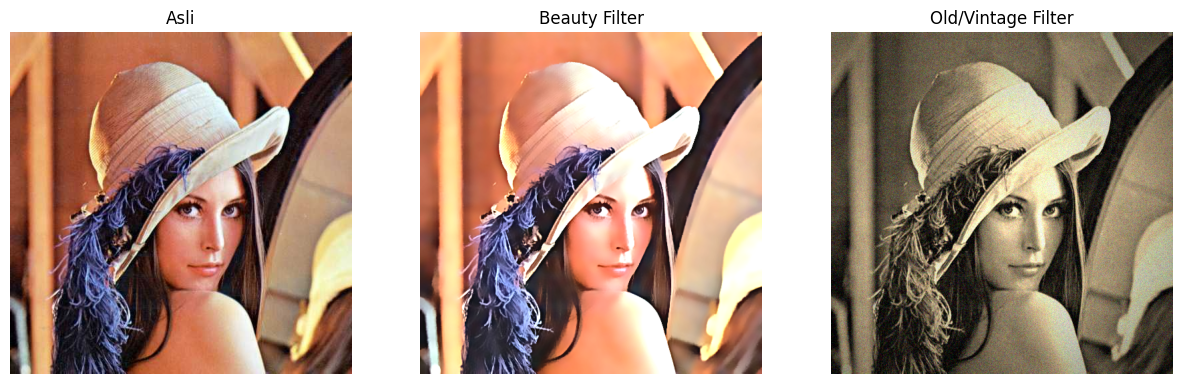

In [18]:
# ===================
# 1. Beauty Filter
# ===================
# Step 1: Smoothing kulit dengan bilateral filter
smooth = cv.bilateralFilter(img, d=15, sigmaColor=75, sigmaSpace=75)

# Step 2: Unsharp masking (pertajam mata/bibir)
gaussian = cv.GaussianBlur(smooth, (0, 0), 3)
sharpened = cv.addWeighted(smooth, 1.5, gaussian, -0.5, 0)

# Step 3: Brightness & contrast
alpha = 1.2 # contrast
beta = 15 # brightness
beauty = cv.convertScaleAbs(sharpened, alpha=alpha, beta=beta)


# ===================
# 2. Old/Vintage Filter
# ===================
# Step 1: Sepia tone
sepia_kernel = np.array([[0.272, 0.534, 0.131],
                         [0.349, 0.686, 0.168],
                         [0.393, 0.769, 0.189]])
sepia = cv.transform(img, sepia_kernel)
sepia = np.clip(sepia, 0, 255).astype(np.uint8)

# Step 2: Vignette
rows, cols = img.shape[:2]
kernel_x = cv.getGaussianKernel(cols, cols*0.6)
kernel_y = cv.getGaussianKernel(rows, rows*0.6)
kernel = kernel_y * kernel_x.T
mask = kernel / kernel.max()
vignette = np.copy(sepia)
for i in range(3):
    vignette[:,:,i] = vignette[:,:,i] * mask

# Step 3: Noise/Grain
noise = np.random.normal(0, 15, vignette.shape).astype(np.int16)
old_img = np.clip(vignette.astype(np.int16) + noise, 0, 255).astype(np.uint8)

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
beauty_rgb = cv.cvtColor(beauty, cv.COLOR_BGR2RGB)
old_rgb = cv.cvtColor(old_img, cv.COLOR_BGR2RGB)

# Tampilkan dalam grid
titles = ["Asli", "Beauty Filter", "Old/Vintage Filter"]
images = [img_rgb, beauty_rgb, old_rgb]

plt.figure(figsize=(15,5))
for i in range(len(images)):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis("off")
plt.show()

Percobaan 5

menunjukkan pada anda filter anime / cartoon menggunakan kombinasi filter
tradisional.

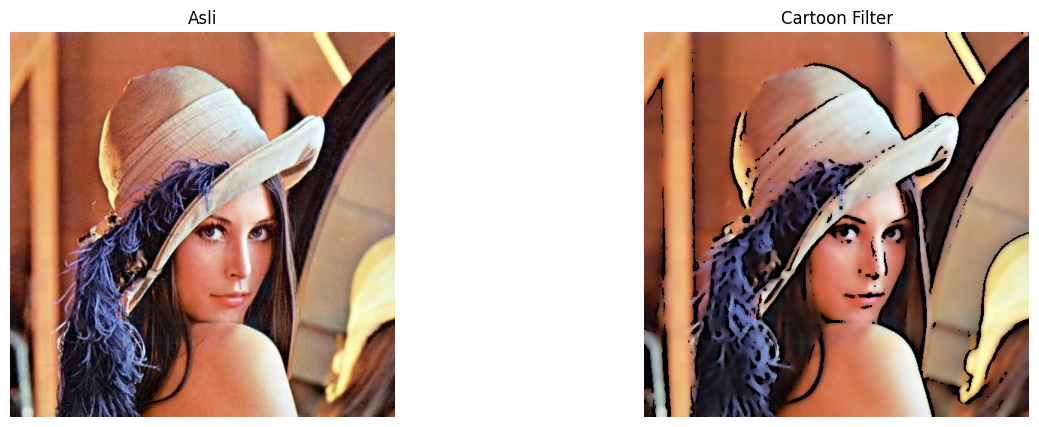

In [19]:
#Filter Anime / Cartoon
# Step 1: Edge detection (pakai median blur dulu agar gambar menjadi lebih halus)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_blur = cv.medianBlur(gray, 7)
edges = cv.adaptiveThreshold(gray_blur, 255,
                             cv.ADAPTIVE_THRESH_MEAN_C,
                             cv.THRESH_BINARY, 9, 9)

# Step 2: Bilateral filter untuk smoothing warna
color = cv.bilateralFilter(img, d=9, sigmaColor=200, sigmaSpace=200)

# Step 3: Gabungkan (cartoonize)
cartoon = cv.bitwise_and(color, color, mask=edges)

# Tampilkan
show_side_by_side([img, cartoon], ["Asli", "Cartoon Filter"])

Percobaan 6:

Pada Percobaan 6 akan ditunjukkan contoh Filter Malam.

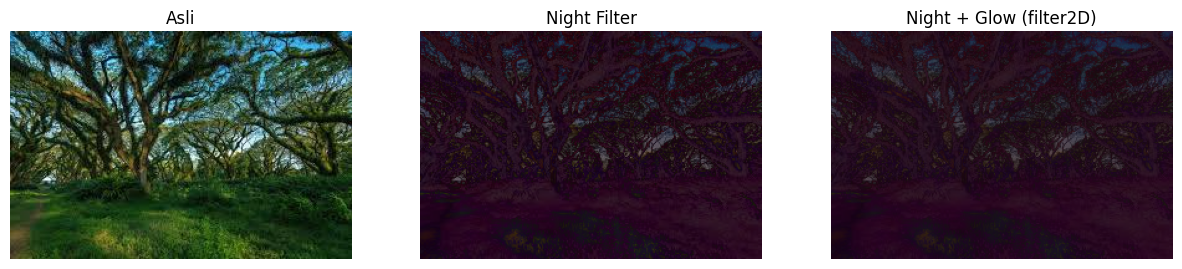

In [21]:
#Night Filter
img = cv.imread("/content/drive/MyDrive/PCVK/Images/djawatan.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Step 1: Gelapkan (contrast turun, brightness negatif)
night = cv.convertScaleAbs(img, alpha=0.6, beta=-40)

# Step 2: Tambah bias biru
blue_tint = np.full_like(night, (50, 0, 100)) # BGR
night = cv.addWeighted(night, 0.8, blue_tint, 0.2, 0)

# Step 3: Efek glow di area terang dengan filter2D (blur kernel)
kernel = np.ones((15, 15), np.float32) / 225
glow = cv.filter2D(night, -1, kernel)

# Kombinasikan asli + glow
night_glow = cv.addWeighted(night, 0.7, glow, 0.3, 0)

show_side_by_side([img, night, night_glow],
                  ["Asli", "Night Filter", "Night + Glow (filter2D)"])

Percobaan 7

Percobaan 7 menunjukkan Filter Pagi dan Pagi ditambahkan efek kabut.

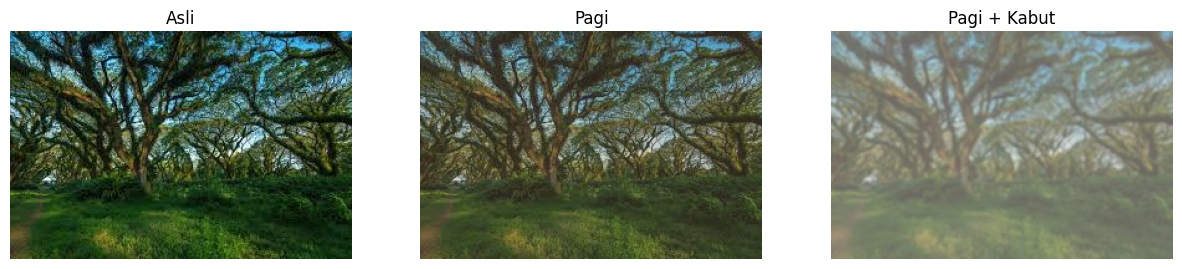

In [22]:
#Filter Suasana pagi dan Kabut
# ========================
# Step 1: Kurangi kontras & cerahkan
# ========================
alpha = 0.9 # contrast
beta = 20 # brightness
soft = cv.convertScaleAbs(img, alpha=alpha, beta=beta)

# ========================
# Step 2: Tambahkan warm tone (kemerahan / oranye)
# ========================
warm_tint = np.full_like(soft, (40, 70, 120)) # BGR
pagi = cv.addWeighted(soft, 0.8, warm_tint, 0.2, 0)

# ========================
# Step 3: Tambahkan haze (kabut tipis) dengan filter2D
# ========================
# Kernel blur Gaussian-like untuk menciptakan efek kabut
kernel = cv.getGaussianKernel(3, 3)
kernel = kernel @ kernel.T # jadikan 2D kernel
kabut = cv.filter2D(pagi, -1, kernel)

# tambah Layer putih untuk kabut Lebih nyata
white_layer = np.full_like(pagi, 255)
kabut = cv.addWeighted(kabut, 0.7, white_layer, 0.3, 0)

show_side_by_side([img, pagi, kabut],
                  ["Asli", "Pagi", "Pagi + Kabut"])